In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
#값들은 다 NaN 값 상태
df = pd.DataFrame(index=range(0,77), columns=['A','B','C','D'])

#일괄적으로 값을 부여하고 싶을때! 
df = df.apply(lambda x: df.apply(lambda b: str(b.name), axis=1), axis=0)

In [3]:
df

,A,B,C,D
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4
...,...,...,...,...
72,72,72,72,72
73,73,73,73,73
74,74,74,74,74
75,75,75,75,75


In [4]:
# loc & iloc 잘 구별하기!

# 1. A컬럼의 0번 index에 위치한 값을 선택하시오
df['A'].loc[0]
df['A'].iloc[0]

# 2. A컬럼의 0~10번 index에 속한 값들을 선택하시오
df['A'].loc[0:10]
df['A'].iloc[0:11]

# 3. A컬럼부터 C컬럼까지만 선택하시오
df.loc[:, 'A':'C']
df.iloc[:, 0:3]

,A,B,C
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
...,...,...,...
72,72,72,72
73,73,73,73
74,74,74,74
75,75,75,75


In [5]:
import random
random.seed(100)

# 열 기준으로 0~100 사이의 난수 생성 (정수)
num_df = df.apply(lambda x: df.apply(lambda x: random.randint(0,101),axis=1))
num_df

,A,B,C,D
0,18,67,20,98
1,58,87,6,23
2,58,43,60,10
3,98,69,96,2
4,22,46,6,88
...,...,...,...,...
72,91,61,41,72
73,37,69,86,18
74,88,4,56,17
75,75,89,4,97


In [6]:
# num_df의 A와 B값을 합친 D 컬럼을 만드시오.

num_df['D'] = num_df['A'] + num_df['B']
num_df

# num_df의 A~D 까지의 sum인 sum 컬럼을 만드시오
num_df['sum'] = num_df.sum(axis=1)
num_df

# 각 컬럼 값들의 상관계수를 구하시오
covAB = sum((num_df['A'] - num_df['A'].mean()) * (num_df['B'] - num_df['B'].mean())) / len(num_df)

std_A = (sum((num_df['A'] - num_df['A'].mean())**2) / len(num_df)) ** (1/2)
std_B = (sum((num_df['B'] - num_df['B'].mean())**2) / len(num_df)) ** (1/2)

corrAB = covAB / (std_A * std_B)

corrAB

0.13269879038077087

## 2. python - apply lambda

In [7]:
# 77행 4열 데이터프레임
df = pd.DataFrame(index=range(0,77), columns=['A','B','C','D'])

# 각 셀에 (index값 + 열 이름 소문자) 부여
for col in df.columns:
    for ind in df.index:
        df[col].loc[ind] = str(ind) + col.lower()
        
df        

,A,B,C,D
0,0a,0b,0c,0d
1,1a,1b,1c,1d
2,2a,2b,2c,2d
3,3a,3b,3c,3d
4,4a,4b,4c,4d
...,...,...,...,...
72,72a,72b,72c,72d
73,73a,73b,73c,73d
74,74a,74b,74c,74d
75,75a,75b,75c,75d


In [8]:
df = pd.DataFrame(index=range(0,77), columns=['A','B','C','D'])
df = df.apply(lambda x: df.apply(lambda x: str(x.name), axis=1)+ x.name.lower())
df

,A,B,C,D
0,0a,0b,0c,0d
1,1a,1b,1c,1d
2,2a,2b,2c,2d
3,3a,3b,3c,3d
4,4a,4b,4c,4d
...,...,...,...,...
72,72a,72b,72c,72d
73,73a,73b,73c,73d
74,74a,74b,74c,74d
75,75a,75b,75c,75d


In [9]:
# apply 기능
# why?

# 더 빠르게 처리 -> 시간 절약

from time import time
df = pd.DataFrame(index=range(0,77), columns=['A','B','C','D'])

pos1 = time()

for i in range(0, 100):
    for col in df.columns:
        for ind in df.index:
            df[col].loc[ind] = str(ind) + col.lower()
            
print(time()-pos1)

pos1 = time()

for i in range(0,100):
    df.apply(lambda x: df.apply(lambda x: str(x.name), axis=1)+ x.name.lower())

print(time()-pos1)

2.584132432937622
0.36797285079956055


In [10]:
df.apply(lambda x: random.randint(0, 101), axis=1) # 1 = 가로방향, 0 = 세로방향

0     74
1     18
2     21
3     45
4     94
      ..
72    89
73    56
74    79
75    24
76    41
Length: 77, dtype: int64

In [11]:
df.apply(lambda x: df.apply(lambda x: random.randint(0,101),axis=1),axis=0)

,A,B,C,D
0,11,51,0,82
1,20,2,34,36
2,43,59,10,49
3,76,43,68,1
4,98,5,92,3
...,...,...,...,...
72,27,39,67,0
73,99,29,16,37
74,84,51,60,69
75,66,55,18,4


# 3. request + beautifulsoup 이용해서 삼성전자 주가 가져오기

크롤링 할 페이지: 

https://finance.naver.com/item/sise_day.nhn?code=005930&page=1

In [12]:
from bs4 import BeautifulSoup

In [13]:
code = '005930'   # 삼성전자

In [14]:
import requests
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'
# Window10 시스템에서 크롬 브라우저 사용
agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
response = requests.get(url = url, headers = {'User-Agent': agent})
_soap = BeautifulSoup(response.text, 'lxml')
response.status_code # 200이 호출되면 정상적인 url 사이트

200

In [15]:
import traceback
import pandas as pd

# 함수로 만들어본다
def parse_page(code, page):
    try:
        url = 'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
        agend = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
        response = requests.get(url = url, headers = {'User-Agent': agent})
        _soap = BeautifulSoup(response.text, 'lxml')
        _df = pd.read_html(str(_soap.find('table')), header=0)[0]
        # NaN 값 제거
        _df = _df.dropna()
        return _df
    
    # 예외 발생시 처리
    except:
        print('Error!')
    
    return None

In [16]:
data = parse_page(code,1)
data = data.sort_values('날짜')

In [17]:
data

,날짜,종가,전일비,시가,고가,저가,거래량
13,2023.01.10,60400.0,300.0,60200.0,61100.0,59900.0,14859797.0
12,2023.01.11,60500.0,100.0,61000.0,61200.0,60300.0,12310751.0
11,2023.01.12,60500.0,0.0,61100.0,61200.0,59900.0,16102561.0
10,2023.01.13,60800.0,300.0,60500.0,61200.0,60400.0,12510328.0
9,2023.01.16,61100.0,300.0,61300.0,61600.0,60800.0,10039972.0
5,2023.01.17,61000.0,100.0,61200.0,61500.0,60600.0,9831456.0
4,2023.01.18,60400.0,600.0,60700.0,61000.0,59900.0,11584041.0
3,2023.01.19,61500.0,1100.0,60500.0,61500.0,60400.0,12808490.0
2,2023.01.20,61800.0,300.0,62100.0,62300.0,61100.0,9646327.0
1,2023.01.25,63400.0,1600.0,63500.0,63700.0,63000.0,16790943.0


In [18]:
data.set_index(data['날짜'], inplace=True, drop=True)
data.drop(['날짜'], inplace=True, axis=1)
data

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2023.01.10,60400.0,300.0,60200.0,61100.0,59900.0,14859797.0
2023.01.11,60500.0,100.0,61000.0,61200.0,60300.0,12310751.0
2023.01.12,60500.0,0.0,61100.0,61200.0,59900.0,16102561.0
2023.01.13,60800.0,300.0,60500.0,61200.0,60400.0,12510328.0
2023.01.16,61100.0,300.0,61300.0,61600.0,60800.0,10039972.0
2023.01.17,61000.0,100.0,61200.0,61500.0,60600.0,9831456.0
2023.01.18,60400.0,600.0,60700.0,61000.0,59900.0,11584041.0
2023.01.19,61500.0,1100.0,60500.0,61500.0,60400.0,12808490.0
2023.01.20,61800.0,300.0,62100.0,62300.0,61100.0,9646327.0


# 4. matplotlib, 캔들 데이터 그리기

Text(0, 0.5, 'Price')

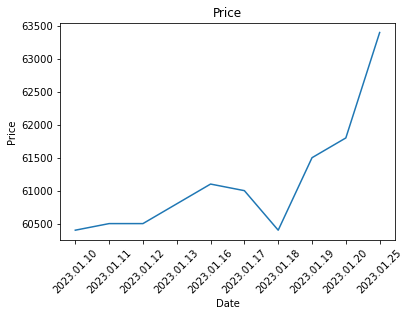

In [19]:
# 그래프 결과
plt.plot(data['종가'])
plt.title('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')

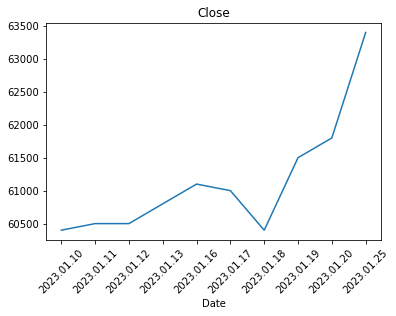

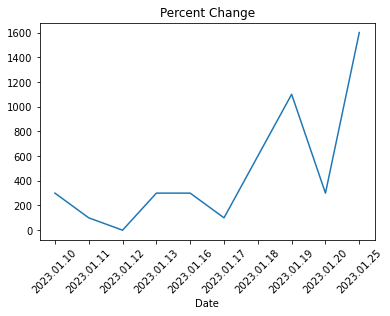

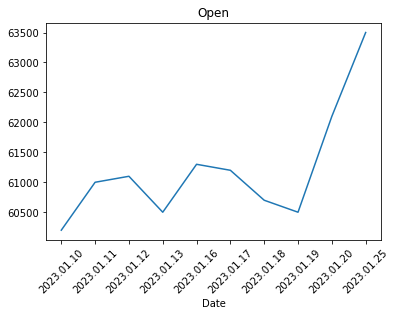

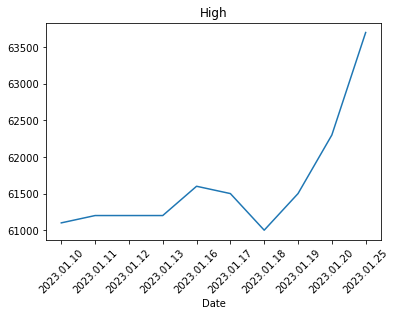

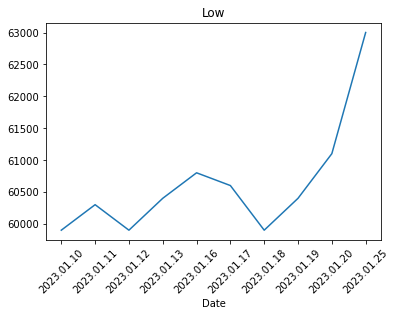

In [20]:
# 개별 이미지에 그리는 법
Title = ['Close', 'Percent Change', 'Open', 'High', 'Low']

# 마지막 열인 거래량 열 제외한 모든 열 갖고 옴
for title,i in enumerate(data.columns[:-1]):
    plt.plot(data[i])
    plt.title(Title[title])
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.show()
    